In [3]:
import pandas as pd
import numpy as np
import sqlite3 as sql


def set_pandas_display_options() -> None:
    display = pd.options.display
    display.max_columns = None
    display.max_rows = None
    display.max_colwidth = 100
    display.width = None
set_pandas_display_options()


# Read the CSV files provided for the case study
activities = pd.read_csv('website_activities.csv',header=0)
channel_1 = pd.read_csv('channel_1.csv', header=0)
channel_2 = pd.read_csv('channel_2.csv', header=0)

First step in this process will be to understand the details behind each of the datasets provided and determine at a high-level different characteristics of each dataset.

Evalue whether these datasets need any additional transformation prior to evaluation to ensure they are consistent in their data type and do not contain any nulls.

In [4]:
# Create function to provide overview on the dataset that includes feature, type, count of records, unique records, missed values and % of missing values
def dataset_details(dataset):
    feature = []
    dtype = []
    unique =[]
    count = []
    missing_values=[]
    missing_percentage = []
    
    for column in dataset.columns :
        feature.append(column)
        dtype.append(dataset[column].dtype)
        unique.append(dataset[column].unique())
        count.append(len(dataset[column]))
        missing_values.append(dataset[column].isnull().sum())
        missing_percentage.append(round((dataset[column].isnull().sum()/len(dataset))*100 , 2))
        
        
    details = pd.DataFrame({
        'Feature' : feature , 
        'Type' : dtype , 
        'Count' : count , 
        'Unique' : unique , 
        "Missed Values" : missing_values,
        'Missed Percent%' : missing_percentage,
       
    })
    
    return details

In [5]:
dataset_details(activities)


,Feature,Type,Count,Unique,Missed Values,Missed Percent%
0,date_time,object,153840,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/...",0,0.0
1,tracking_code,object,153840,"[Vanity20011, ps_ggl_40686, ps_msn_38158, ds_9291572_2385165_126150817_302954160_0, ps_ggl_54025...",0,0.0
2,visits,int64,153840,"[25857, 967, 654, 373, 222, 215, 175, 142, 123, 97, 80, 76, 75, 73, 60, 57, 54, 52, 46, 45, 44, ...",0,0.0
3,page_view,int64,153840,"[38499, 6188, 4206, 494, 238, 262, 1035, 260, 199, 509, 100, 84, 412, 79, 285, 85, 179, 60, 93, ...",0,0.0
4,TOOL_STARTS,int64,153840,"[84, 23, 13, 2, 0, 4, 12, 1, 5, 24, 6, 3, 7, 14, 25, 16, 9, 8, 48, 10, 11, 17, 15, 29, 32, 18, 2...",0,0.0
5,TOOL_COMPLETES,int64,153840,"[9, 5, 3, 0, 1, 10, 4, 17, 2, 6, 13, 8, 22, 11, 28, 14, 7, 19, 15, 16, 27, 18, 21, 34, 12, 25, 4...",0,0.0
6,LIT_DOWNLOADSS,int64,153840,"[8928, 41, 43, 0, 1, 2, 4, 1510, 13, 10, 3, 5, 8, 731, 42, 7, 12, 575, 26, 614, 66, 63, 9, 14, 6...",0,0.0
7,TOOL_DOWNLOADS,int64,153840,"[1, 0, 3, 5, 9, 2, 4, 6, 11, 25, 10, 8]",0,0.0
8,VID_STARTS,int64,153840,"[2, 3, 0, 1, 6, 11, 25, 7, 4, 10, 53, 5, 15, 22, 47, 8, 12, 13, 9, 20, 24, 94, 63, 17, 21, 14, 1...",0,0.0
9,Sales,float64,153840,"[126764.19, 8577.59, 6051.71, 565.86, 151.36, 537.34, 807.55, 729.91, 743.77, 1879.99, 11.03, 10...",0,0.0


In [6]:
# Describe the columns for the activities dataframe
activities.describe(include='all')


,date_time,tracking_code,visits,page_view,TOOL_STARTS,TOOL_COMPLETES,LIT_DOWNLOADSS,TOOL_DOWNLOADS,VID_STARTS,Sales
count,153840,153840,153840.000000,153840.000000,153840.000000,153840.000000,153840.000000,153840.000000,153840.000000,153840.000000
unique,184,5619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,12/29/2016,ps_ggl_23038,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1223,184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,10.961830,38.561804,0.255636,0.129589,0.734640,0.004869,0.035290,544.644072
std,NaN,NaN,145.393267,470.766692,2.439275,1.381971,46.925568,0.163319,1.060147,912.186081
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,NaN,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,143.610000
50%,NaN,NaN,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,387.725000
75%,NaN,NaN,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,795.490000


In [7]:
dataset_details(channel_1)

,Feature,Type,Count,Unique,Missed Values,Missed Percent%
0,date,object,79181,"[2016-07-01, 2016-07-02, 2016-07-03, 2016-07-04, 2016-07-05, 2016-07-06, 2016-07-07, 2016-07-08,...",0,0.0
1,tracking_code,object,79181,"[ps_msn_38360, ps_msn_38366, ps_msn_38444, ps_msn_38442, ps_ggl_40615, ps_msn_38515, ps_ggl_4108...",0,0.0
2,campaignname,object,79181,"[B2C_BR_401K_Standard, B2C_BR_403B_Standard, B2C_BR_AMCAP Funds_Standard, B2C_BR_Balanced Funds_...",0,0.0
3,adgroup,object,79181,"[Company X 401K Exact, Company X 401K Broad Match Modify, Company X 403B Broad Match Modify, ...",0,0.0
4,keyword,object,79181,"[company x 401 k, +company +x 401k, +company +x 403b, company x 403b, +company +x 403 b, company...",0,0.0
5,Impressions,float64,79181,"[1.0, 6.0, 34.0, 2.0, 12.0, 3.0, 4.0, 5.0, 8.0, 9.0, 15.0, 23.0, 7.0, 11.0, 10.0, 14.0, 52.0, 13...",0,0.0
6,Clicks,int64,79181,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, ...",0,0.0
7,cost,float64,79181,"[1.34, 1.03, 0.4, 0.66, 0.82, 0.26, 1.26, 0.08, 1.89, 1.12, 0.05, 0.94, 1.25, 0.63, 0.74, 1.17, ...",0,0.0


In [8]:
# Describe the columns for the activities dataframe
channel_1.describe(include='all')

,date,tracking_code,campaignname,adgroup,keyword,Impressions,Clicks,cost
count,79181,79181,79181,79181,79181,79181.000000,79181.000000,79181.000000
unique,182,2961,80,584,1534,NaN,NaN,NaN
top,2016-12-27,ps_ggl_41777,B2C_NB_Retirement Plans_Standard,Company X 401K Broad Match Modify,simple ira,NaN,NaN,NaN
freq,774,182,5657,1360,657,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,234.383324,12.110064,22.179841
std,NaN,NaN,NaN,NaN,NaN,1387.617586,88.841115,121.723290
min,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,7.000000,1.000000,1.450000
50%,NaN,NaN,NaN,NaN,NaN,24.000000,2.000000,3.680000
75%,NaN,NaN,NaN,NaN,NaN,82.000000,5.000000,10.630000


In [9]:
dataset_details(channel_2)

,Feature,Type,Count,Unique,Missed Values,Missed Percent%
0,date,object,199972,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/...",0,0.0
1,tracking_code,object,199972,"[DS_9291572_2106501_126155460_299587824_67439960, DS_9291572_1312649_126155477_299137099_6816580...",0,0.0
2,campaign,object,199972,"[B2C_Investor_ 2016CY, American Funds_ B2B_FI_2016CY, American Funds B2C Investor 2015, American...",0,0.0
3,placement,object,199972,"[Investor_Native Ad Unit_Behavioral Targeting_Multiple/Dynamic Sizes_1x1, Desktop Package _Prima...",0,0.0
4,creative,object,199972,"[Tracking Creative, Investor_System_728x90, Investor_LowFees_728x90, Investor_Global Research v....",0,0.0
5,site(DCM),object,199972,"[Nativo, Inc, coreaudience.com, CNBC, CNNMoney.com, Financial Planning, kiplinger.com, The Stree...",0,0.0
6,impression,int64,199972,"[118490, 57239, 57236, 57093, 57019, 38505, 29522, 23500, 23351, 23338, 22979, 20157, 20088, 199...",0,0.0
7,clicks,int64,199972,"[0, 31, 22, 19, 27, 62, 96, 11, 15, 16, 12, 10, 3, 171, 80, 7, 4, 2, 1, 8, 14, 6, 5, 114, 103, 4...",0,0.0
8,cost,float64,199972,"[2167.26, 486.53, 486.51, 485.29, 484.66, 115.52, 1180.88, 199.75, 198.48, 198.37, 195.32, 171.3...",0,0.0


In [10]:
# Describe the columns for the activities dataframe
channel_2.describe(include='all')

,date,tracking_code,campaign,placement,creative,site(DCM),impression,clicks,cost
count,199972,199972,199972,199972,199972,199972,1.999720e+05,199972.000000,199972.000000
unique,159,1952,4,413,85,26,NaN,NaN,NaN
top,12/1/2016,DS_9291572_702495_126155424_299137093_68165124,B2C_Investor_ 2016CY,Investor_High Net Worth Content Rotations_Desktop_728x90,Investor_System_300x250,kiplinger.com,NaN,NaN,NaN
freq,1440,471,198254,1250,10468,34227,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,1.983545e+03,2.148926,21.031773
std,NaN,NaN,NaN,NaN,NaN,NaN,2.638781e+04,26.078233,124.891048
min,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,-1.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,1.190000e+02,0.000000,0.530000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.865000e+02,0.000000,5.040000
75%,NaN,NaN,NaN,NaN,NaN,NaN,1.084000e+03,1.000000,17.060000


Since nothing appears to be missing for these columns, it is safe to proceed with adding additional variables to help track website activities and channel performance.

This step will also include cleaning up necessary columns, convert datatypes, and add additional columns.


In [11]:
#Convert date in channel_1 and channel_2 to datetime
activities['date_time'] = pd.to_datetime(activities['date_time'])
channel_1['date'] = pd.to_datetime(channel_1['date'])
channel_2['date'] = pd.to_datetime(channel_2['date'])



# Based on evaluation of key metrics, the following metrics are determined effective to provide insight into the website performance:

## ACTIVITIES ##
# Create columns in the activities dataframe to track the day of the week and hour of the day
activities['day_of_week'] = activities['date_time'].dt.day_name()
activities['hour_of_day'] = activities['date_time'].dt.hour


# Create key metric groupings to determine the 
activities['total_conversions'] = activities['TOOL_DOWNLOADS'].fillna(0) + activities['LIT_DOWNLOADSS'].fillna(0)
activities['total_conversions'] = activities['total_conversions'].astype(int)

activities['total_engagements'] = activities['TOOL_DOWNLOADS'].fillna(0) + activities['VID_STARTS'].fillna(0)
activities['total_engagements'] = activities['total_engagements'].astype(int)


activities['tracking_code'] = activities['tracking_code'].str.lower()
## CHANNEL 1 ##
# Create a new column in the channel_1 dataframe to track the month of the year & day of the week
channel_1['month_of_year'] = channel_1['date'].dt.month
channel_1['day_of_week'] = channel_1['date'].dt.day_name()

## CHANNEL 2 ##
# Create a new column in the channel_2 dataframe to track the month of the year & day of the week
channel_2['month_of_year'] = channel_2['date'].dt.month
channel_2['day_of_week'] = channel_2['date'].dt.day_name()
channel_2['tracking_code'] = channel_2['tracking_code'].str.lower()


print(activities.info())
print(channel_1.info())
print(channel_2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153840 entries, 0 to 153839
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_time          153840 non-null  datetime64[ns]
 1   tracking_code      153840 non-null  object        
 2   visits             153840 non-null  int64         
 3   page_view          153840 non-null  int64         
 4   TOOL_STARTS        153840 non-null  int64         
 5   TOOL_COMPLETES     153840 non-null  int64         
 6   LIT_DOWNLOADSS     153840 non-null  int64         
 7   TOOL_DOWNLOADS     153840 non-null  int64         
 8   VID_STARTS         153840 non-null  int64         
 9    Sales             153840 non-null  float64       
 10  day_of_week        153840 non-null  object        
 11  hour_of_day        153840 non-null  int32         
 12  total_conversions  153840 non-null  int64         
 13  total_engagements  153840 non-null  int64   

In [12]:

# Generate additional metrics for the key website activities

combined_activities_by_channel_1 = pd.merge(
    activities,
    channel_1,
    left_on=(['date_time','tracking_code']),
    right_on=(['date','tracking_code']),
    how='left'
)

combined_activities_by_channel_2 = pd.merge(
    activities,
    channel_2,
    left_on=(['date_time','tracking_code']),
    right_on=(['date','tracking_code']),
    how='left'
)

# Fill any null values in the combined datasets with 0
combined_activities_by_channel_1 = combined_activities_by_channel_1.fillna(0)
combined_activities_by_channel_2 = combined_activities_by_channel_2.fillna(0)


combined_activities_by_channel_1.columns = [c.lower().replace(' ', '') for c in combined_activities_by_channel_1.columns]
combined_activities_by_channel_2.columns = [c.lower().replace(' ', '') for c in combined_activities_by_channel_2.columns]

#filter on one example to ensure proper join

#combined_activities_by_channel_1 = combined_activities_by_channel_1[combined_activities_by_channel_1['campaignname'] == 'B2C_NB_Brexit_Standard']
#combined_activities_by_channel_2 = combined_activities_by_channel_2[combined_activities_by_channel_2['campaign'] == 'B2C_Investor_ 2016CY']

display(combined_activities_by_channel_1.head(10))

display(combined_activities_by_channel_1.head(10))


display(combined_activities_by_channel_2.info())

,date_time,tracking_code,visits,page_view,tool_starts,tool_completes,lit_downloadss,tool_downloads,vid_starts,sales,day_of_week_x,hour_of_day,total_conversions,total_engagements,date,campaignname,adgroup,keyword,impressions,clicks,cost,month_of_year,day_of_week_y
0,2016-07-01,vanity20011,25857,38499,84,9,8928,1,2,126764.19,Friday,0,8929,3,0,0,0,0,0.0,0.0,0.00,0.0,0
1,2016-07-01,ps_ggl_40686,967,6188,23,5,41,1,3,8577.59,Friday,0,42,4,2016-07-01 00:00:00,B2C_BR_Brand Core_Standard,Company X Exact,company funds,3891.0,1011.0,591.09,7.0,Friday
2,2016-07-01,ps_msn_38158,654,4206,13,3,43,0,0,6051.71,Friday,0,43,0,2016-07-01 00:00:00,B2C_BR_Brand Core_Standard,Company X Exact,company funds,2980.0,678.0,84.68,7.0,Friday
3,2016-07-01,ds_9291572_2385165_126150817_302954160_0,373,494,2,0,0,0,0,565.86,Friday,0,0,0,0,0,0,0,0.0,0.0,0.00,0.0,0
4,2016-07-01,ps_ggl_54025,222,238,0,0,0,0,0,151.36,Friday,0,0,0,2016-07-01 00:00:00,B2C_NB_Brexit_Standard,Brexit,brexit,15968.0,256.0,495.78,7.0,Friday
5,2016-07-01,ds_9291572_2385165_126150817_302954729_0,215,262,0,0,0,0,0,537.34,Friday,0,0,0,0,0,0,0,0.0,0.0,0.00,0.0,0
6,2016-07-01,ps_ggl_23025,175,1035,0,0,1,0,0,807.55,Friday,0,1,0,0,0,0,0,0.0,0.0,0.00,0.0,0
7,2016-07-01,ps_msn_38666,142,260,4,1,0,0,0,729.91,Friday,0,0,0,2016-07-01 00:00:00,B2C_NB_Retirement Plans_Standard,Retirement Income Phrase,retirement income,4198.0,188.0,960.92,7.0,Friday
8,2016-07-01,ds_9291572_2385165_126150817_302951866_0,123,199,12,10,1,0,0,743.77,Friday,0,1,0,0,0,0,0,0.0,0.0,0.00,0.0,0
9,2016-07-01,ps_msn_22553,97,509,1,0,1,0,0,1879.99,Friday,0,1,0,0,0,0,0,0.0,0.0,0.00,0.0,0


,date_time,tracking_code,visits,page_view,tool_starts,tool_completes,lit_downloadss,tool_downloads,vid_starts,sales,day_of_week_x,hour_of_day,total_conversions,total_engagements,date,campaignname,adgroup,keyword,impressions,clicks,cost,month_of_year,day_of_week_y
0,2016-07-01,vanity20011,25857,38499,84,9,8928,1,2,126764.19,Friday,0,8929,3,0,0,0,0,0.0,0.0,0.00,0.0,0
1,2016-07-01,ps_ggl_40686,967,6188,23,5,41,1,3,8577.59,Friday,0,42,4,2016-07-01 00:00:00,B2C_BR_Brand Core_Standard,Company X Exact,company funds,3891.0,1011.0,591.09,7.0,Friday
2,2016-07-01,ps_msn_38158,654,4206,13,3,43,0,0,6051.71,Friday,0,43,0,2016-07-01 00:00:00,B2C_BR_Brand Core_Standard,Company X Exact,company funds,2980.0,678.0,84.68,7.0,Friday
3,2016-07-01,ds_9291572_2385165_126150817_302954160_0,373,494,2,0,0,0,0,565.86,Friday,0,0,0,0,0,0,0,0.0,0.0,0.00,0.0,0
4,2016-07-01,ps_ggl_54025,222,238,0,0,0,0,0,151.36,Friday,0,0,0,2016-07-01 00:00:00,B2C_NB_Brexit_Standard,Brexit,brexit,15968.0,256.0,495.78,7.0,Friday
5,2016-07-01,ds_9291572_2385165_126150817_302954729_0,215,262,0,0,0,0,0,537.34,Friday,0,0,0,0,0,0,0,0.0,0.0,0.00,0.0,0
6,2016-07-01,ps_ggl_23025,175,1035,0,0,1,0,0,807.55,Friday,0,1,0,0,0,0,0,0.0,0.0,0.00,0.0,0
7,2016-07-01,ps_msn_38666,142,260,4,1,0,0,0,729.91,Friday,0,0,0,2016-07-01 00:00:00,B2C_NB_Retirement Plans_Standard,Retirement Income Phrase,retirement income,4198.0,188.0,960.92,7.0,Friday
8,2016-07-01,ds_9291572_2385165_126150817_302951866_0,123,199,12,10,1,0,0,743.77,Friday,0,1,0,0,0,0,0,0.0,0.0,0.00,0.0,0
9,2016-07-01,ps_msn_22553,97,509,1,0,1,0,0,1879.99,Friday,0,1,0,0,0,0,0,0.0,0.0,0.00,0.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153840 entries, 0 to 153839
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   date_time          153840 non-null  datetime64[ns]
 1   tracking_code      153840 non-null  object        
 2   visits             153840 non-null  int64         
 3   page_view          153840 non-null  int64         
 4   tool_starts        153840 non-null  int64         
 5   tool_completes     153840 non-null  int64         
 6   lit_downloadss     153840 non-null  int64         
 7   tool_downloads     153840 non-null  int64         
 8   vid_starts         153840 non-null  int64         
 9   sales              153840 non-null  float64       
 10  day_of_week_x      153840 non-null  object        
 11  hour_of_day        153840 non-null  int32         
 12  total_conversions  153840 non-null  int64         
 13  total_engagements  153840 non-null  int64   

None

In [13]:
# Produce High-level summary on the statistics of each dataset based on the available information tied to website activities and each channel

combined_activities_by_channel_1_agg = combined_activities_by_channel_1.agg(
    {
        'tool_starts': 'sum',
        'tool_completes': 'sum',
        'tool_downloads': 'sum',
        'lit_downloadss': 'sum',
        'vid_starts': 'sum',
        'visits': 'sum',
        'page_view': 'sum',
        'sales': 'sum',
        'total_conversions': 'sum',
        'total_engagements': 'sum',
        'impressions': 'sum',
        'clicks': 'sum',
        'cost': 'sum',
        'date': 'count'
    }
).reset_index()

# display(combined_activities_by_channel_1)


combined_activities_by_channel_2_agg = combined_activities_by_channel_2.agg(
    {
        'tool_starts': 'sum',
        'tool_completes': 'sum',
        'tool_downloads': 'sum',
        'lit_downloadss': 'sum',
        'vid_starts': 'sum',
        'visits': 'sum',
        'page_view': 'sum',
        'sales': 'sum',
        'total_conversions': 'sum',
        'total_engagements': 'sum',
        'impression': 'sum',
        'clicks': 'sum',
        'cost': 'sum',
        'date': 'count'
    }
).reset_index()

# display(combined_activities_by_channel_2)

Evaluate how the performance of channel-specific categories; determine the best use of segmentation for insights

In [14]:
# site (DCM) is the best identifier for channel_2 due it the disparity of impressions, clicks, and cost spread across the different sites
combined_activities_by_channel_2_by_site = combined_activities_by_channel_2.groupby('site(dcm)').agg(
    {
        'tool_starts': 'sum',
        'tool_completes': 'sum',
        'tool_downloads': 'sum',
        'lit_downloadss': 'sum',
        'vid_starts': 'sum',
        'visits': 'sum',
        'page_view': 'sum',
        'sales': 'sum',
        'total_conversions': 'sum',
        'total_engagements': 'sum',
        'impression': 'sum',
        'clicks': 'sum',
        'cost': 'sum',
        'date': 'count'
    }
).reset_index()

display(combined_activities_by_channel_2_by_site)



# Campaign is the best identifier for channel_1 due to its uniqueness and relevance to marketing efforts
combined_activities_by_channel_1_by_campaign = combined_activities_by_channel_1.groupby('campaignname').agg(
    {
        'tool_starts': 'sum',
        'tool_completes': 'sum',
        'tool_downloads': 'sum',
        'lit_downloadss': 'sum',
        'vid_starts': 'sum',
        'visits': 'sum',
        'page_view': 'sum',
        'sales': 'sum',
        'total_conversions': 'sum',
        'total_engagements': 'sum',
        'impressions': 'sum',
        'clicks': 'sum',
        'cost': 'sum',
        'date': 'count'
    }
).reset_index()

display(combined_activities_by_channel_1_by_campaign)

,site(dcm),tool_starts,tool_completes,tool_downloads,lit_downloadss,vid_starts,visits,page_view,sales,total_conversions,total_engagements,impression,clicks,cost,date
0,0,39075,19858,749,112701,4950,1558320,5780404,67018557.01,113450,5699,0.0,0.0,0.00,121099
1,Bloomberg,0,0,0,4,1,387,464,135946.22,4,1,824255.0,433.0,331.10,231
2,CNBC,11,5,0,18,282,15090,18059,1044403.29,18,282,13488829.0,28457.0,124606.16,2063
3,CNNMoney.com,9,1,0,21,34,22609,26421,95235.37,21,34,3688038.0,72135.0,147486.86,158
4,Facebook,3,0,0,0,5,5509,5795,18695.37,0,5,53699131.0,23635.0,0.00,47
5,Investopedia,5,0,0,28,38,7657,8472,918312.86,28,38,2302034.0,15046.0,34621.33,1724
6,Morningstar,46,14,0,65,13,3450,5709,850373.58,65,13,1333858.0,4906.0,78553.99,1718
7,New York Times,4,1,0,18,13,3155,3636,1163446.60,18,13,1910766.0,4309.0,60875.88,2309
8,The Street,32,13,0,11,7,15524,17242,1438069.93,11,7,6927848.0,48331.0,137890.51,2902
9,WSJDN,21,11,0,12,37,4884,5937,1618072.54,12,37,3621996.0,6085.0,93055.99,3239


,campaignname,tool_starts,tool_completes,tool_downloads,lit_downloadss,vid_starts,visits,page_view,sales,total_conversions,total_engagements,impressions,clicks,cost,date
0,0,12467,6833,86,73253,4388,852255,2251046,43752076.53,73339,4474,0.0,0.0,0.00,81905
1,B2C_BR_401K_Standard,903,495,0,952,20,29519,147601,1615433.42,952,20,181814.0,32291.0,30285.94,3036
2,B2C_BR_403B_Standard,50,28,0,107,0,513,2879,183122.68,107,0,2759.0,565.0,534.57,349
3,B2C_BR_AMCAP Funds_Standard,21,9,0,254,0,2239,6736,387448.53,254,0,25268.0,2509.0,1676.42,743
4,B2C_BR_Balanced Funds_Standard,130,50,2,1012,4,6133,24115,975552.14,1014,6,50921.0,7274.0,7966.29,1847
5,B2C_BR_Brand Core_Standard,11322,5241,205,23957,629,367615,2449343,4035053.29,24162,834,1510105.0,390492.0,130420.84,2226
6,B2C_BR_Capital World Funds_Standard,6,3,0,51,0,580,2267,189606.66,51,0,2769.0,609.0,1365.16,397
7,B2C_BR_China Economy_Standard,0,0,0,0,0,1,1,849.29,0,0,1.0,1.0,0.29,1
8,B2C_BR_College 529_Standard,2119,1056,396,5514,33,24505,139265,2129597.20,5910,429,145835.0,26685.0,29494.33,4077
9,B2C_BR_Coverdell_Standard,3,0,0,21,0,92,365,36359.03,21,0,259.0,93.0,54.83,82


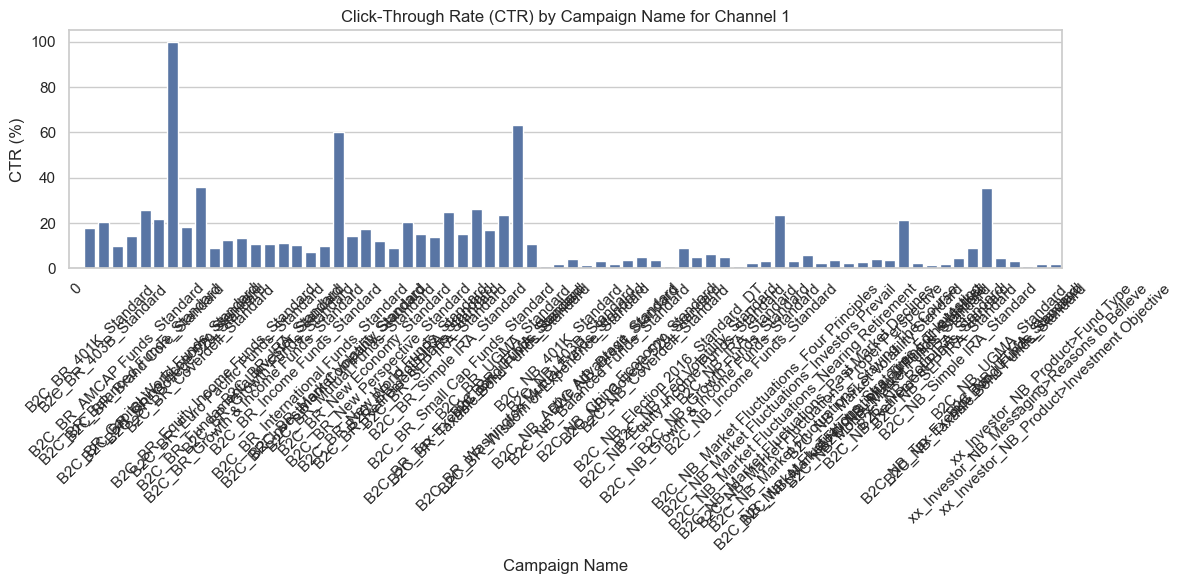

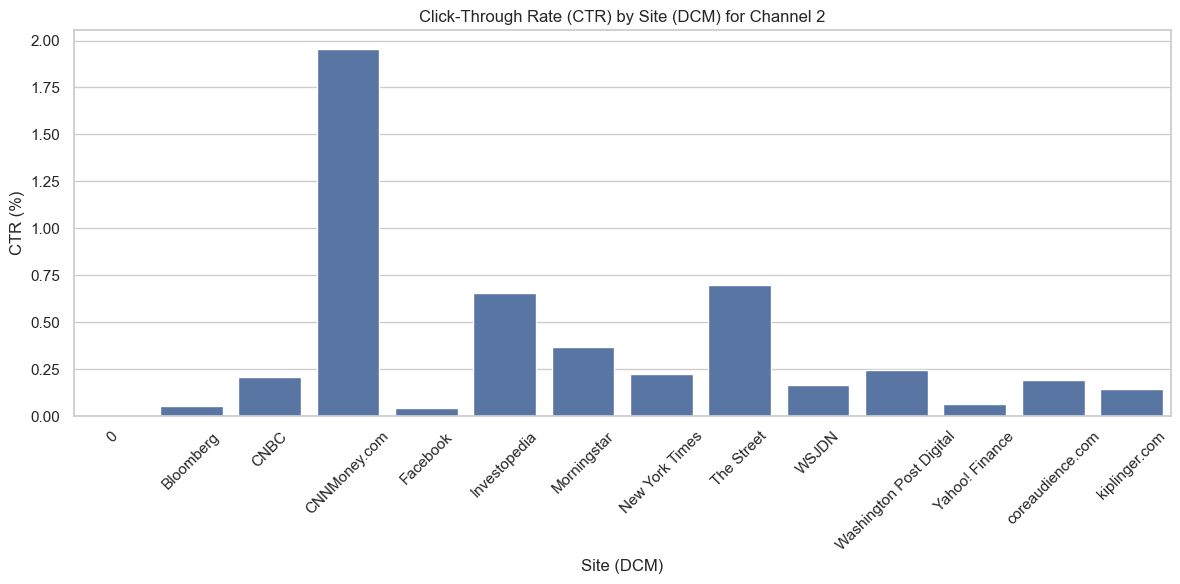

In [15]:
# Since campaignname and site(DCM) are the best identifiers for channel_1 and channel_2 respectively, we will use these fields to evaluate the performance of each channel


# Evaluate how the performance of channel-specific categories; determine the best use of segmentation for insights

# Create CTR, CPC, TAR rates aggregated by campaignname for channel_1
combined_activities_by_channel_1_new_measures = combined_activities_by_channel_1.groupby('campaignname').agg(
    {
        'clicks': 'sum',
        'impressions': 'sum',
        'cost': 'sum',
        'tool_starts': 'sum',
        'tool_completes': 'sum',
    }).reset_index()

combined_activities_by_channel_1_new_measures['CTR'] = np.where(
    combined_activities_by_channel_1_new_measures['impressions'] > 0,
    combined_activities_by_channel_1_new_measures['clicks'] / combined_activities_by_channel_1_new_measures['impressions'],
    0
)  * 100
combined_activities_by_channel_1_new_measures['CPC'] = np.where(
    combined_activities_by_channel_1_new_measures['clicks'] > 0,
    combined_activities_by_channel_1_new_measures['cost'] / combined_activities_by_channel_1_new_measures['clicks'],
    0
)
combined_activities_by_channel_1_new_measures['TAR'] = np.where(
    combined_activities_by_channel_1_new_measures['clicks'] > 0,
    combined_activities_by_channel_1_new_measures['tool_starts'] / combined_activities_by_channel_1_new_measures['clicks'],
    0
) * 100
# display(combined_activities_by_channel_1_new_measures)





# Evaluate how the performance of channel-specific categories; determine the best use of segmentation for insights

# Create CTR, CPC, TAR rates aggregated by site(DCM) for channel_2

combined_activities_by_channel_2_new_measures = combined_activities_by_channel_2.groupby('site(dcm)').agg(
    {
        'clicks': 'sum',
        'impression': 'sum',
        'cost': 'sum',
        'tool_starts': 'sum',
        'tool_completes': 'sum',
    }).reset_index()
combined_activities_by_channel_2_new_measures['CTR'] = np.where(
    combined_activities_by_channel_2_new_measures['impression'] > 0,
    combined_activities_by_channel_2_new_measures['clicks'] / combined_activities_by_channel_2_new_measures['impression'],
    0
)  * 100
combined_activities_by_channel_2_new_measures['CPC'] = np.where(
    combined_activities_by_channel_2_new_measures['clicks'] > 0,
    combined_activities_by_channel_2_new_measures['cost'] / combined_activities_by_channel_2_new_measures['clicks'],
    0
)
combined_activities_by_channel_2_new_measures['TAR'] = np.where(
    combined_activities_by_channel_2_new_measures['clicks'] > 0,
    combined_activities_by_channel_2_new_measures['tool_starts'] / combined_activities_by_channel_2_new_measures['clicks'],
    0
) * 100
# display(combined_activities_by_channel_2_new_measures)




# Plot the results using matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
# Set the style for the plots
sns.set(style="whitegrid")


# Plot CTR by campaignname for channel_1
plt.figure(figsize=(12, 6))
sns.barplot(x='campaignname', y='CTR', data=combined_activities_by_channel_1_new_measures)
plt.title('Click-Through Rate (CTR) by Campaign Name for Channel 1')
plt.xlabel('Campaign Name')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



# Plot CTR by site(DCM) for channel_2
plt.figure(figsize=(12, 6))
sns.barplot(x='site(dcm)', y='CTR', data=combined_activities_by_channel_2_new_measures)
plt.title('Click-Through Rate (CTR) by Site (DCM) for Channel 2')
plt.xlabel('Site (DCM)')
plt.ylabel('CTR (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\nicol\AppData\Local\Temp\ipykernel_34432\3689762646.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


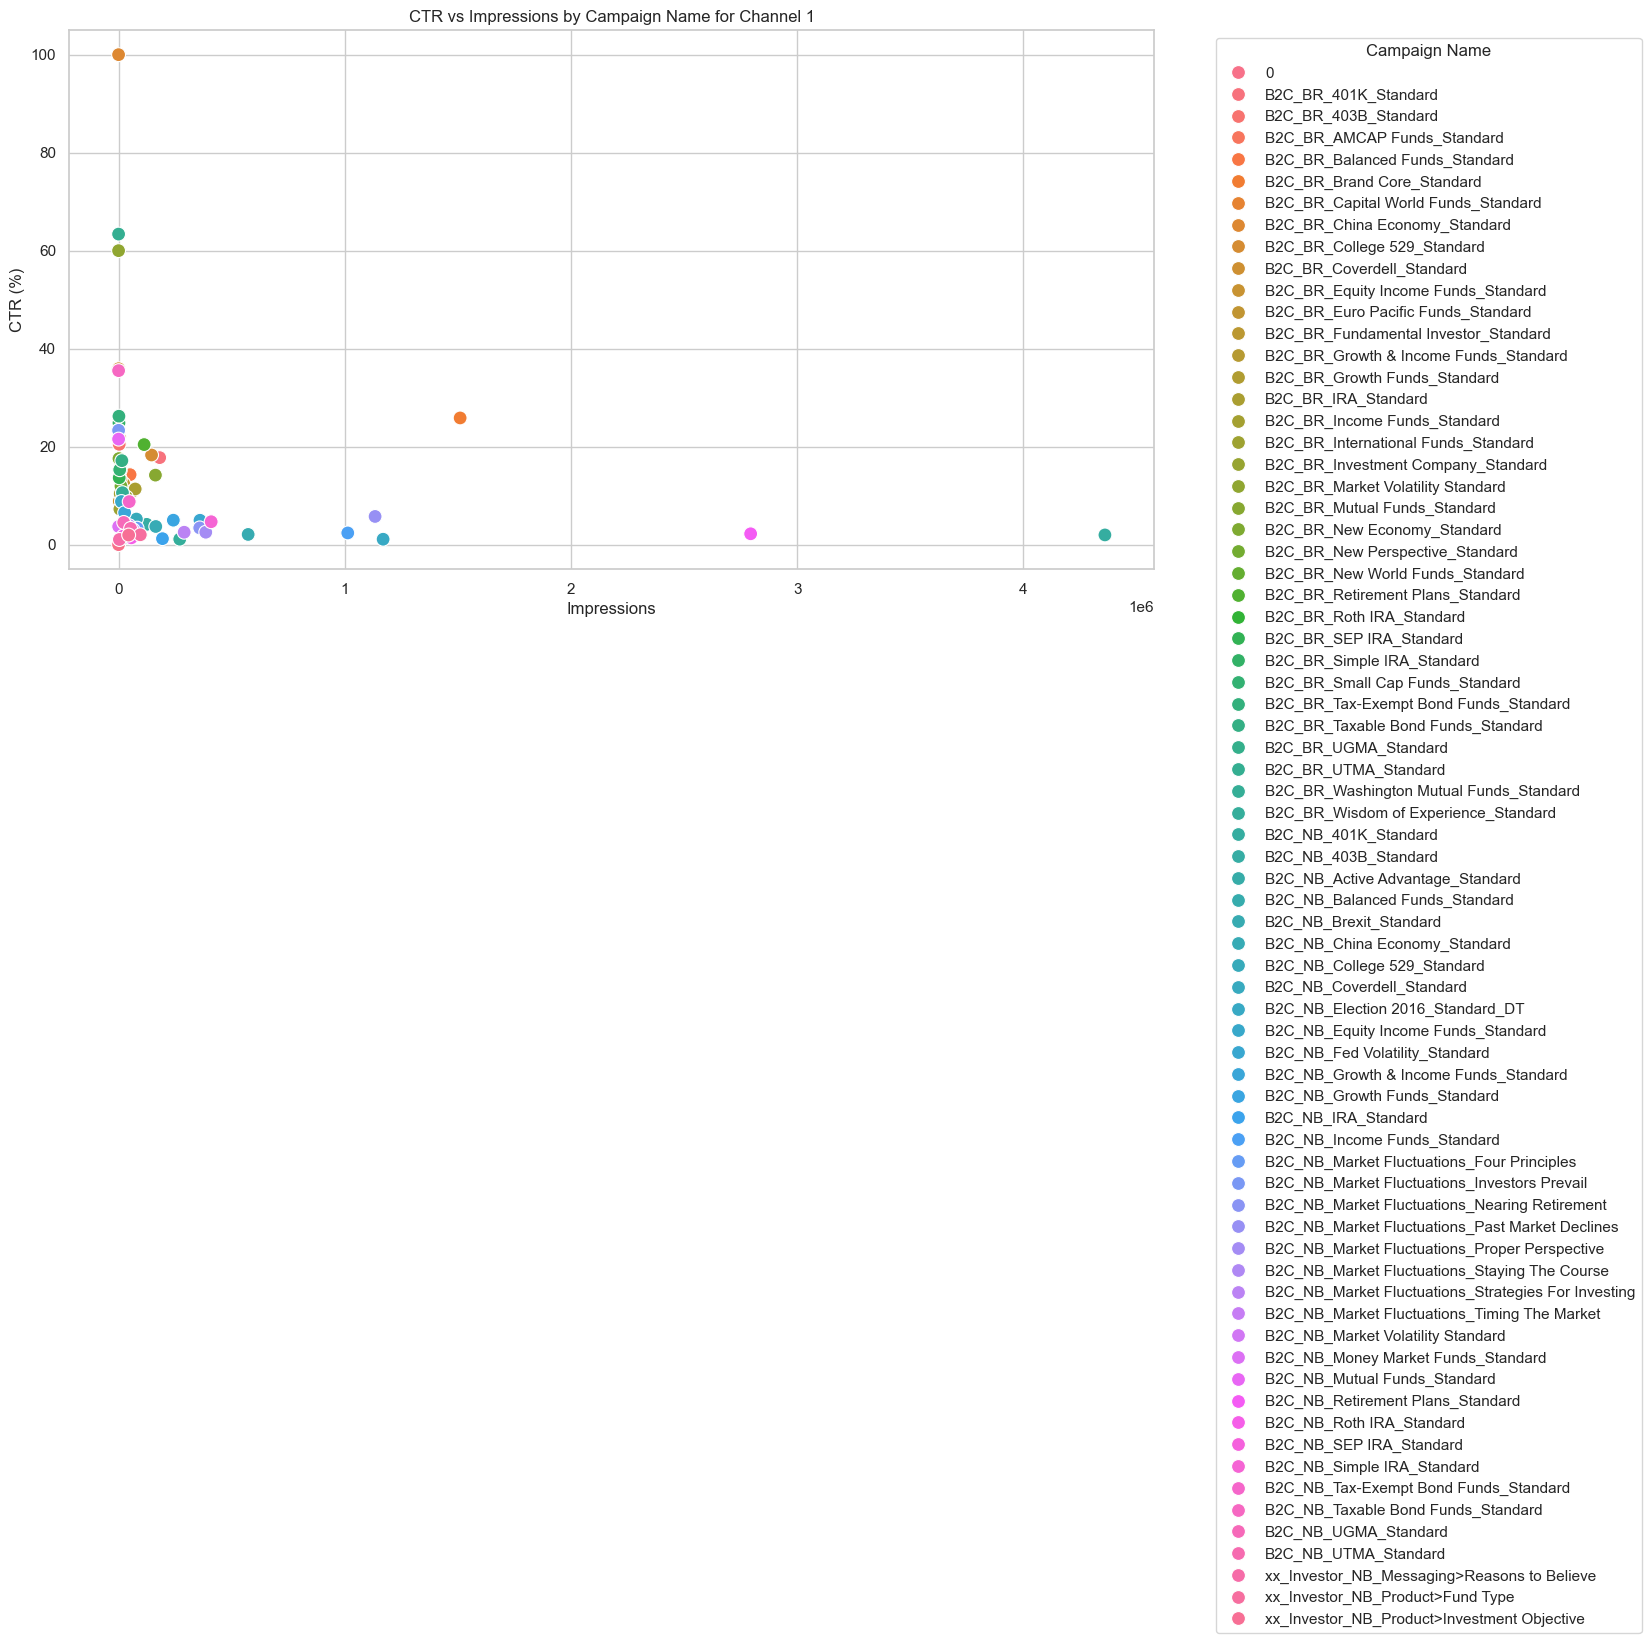

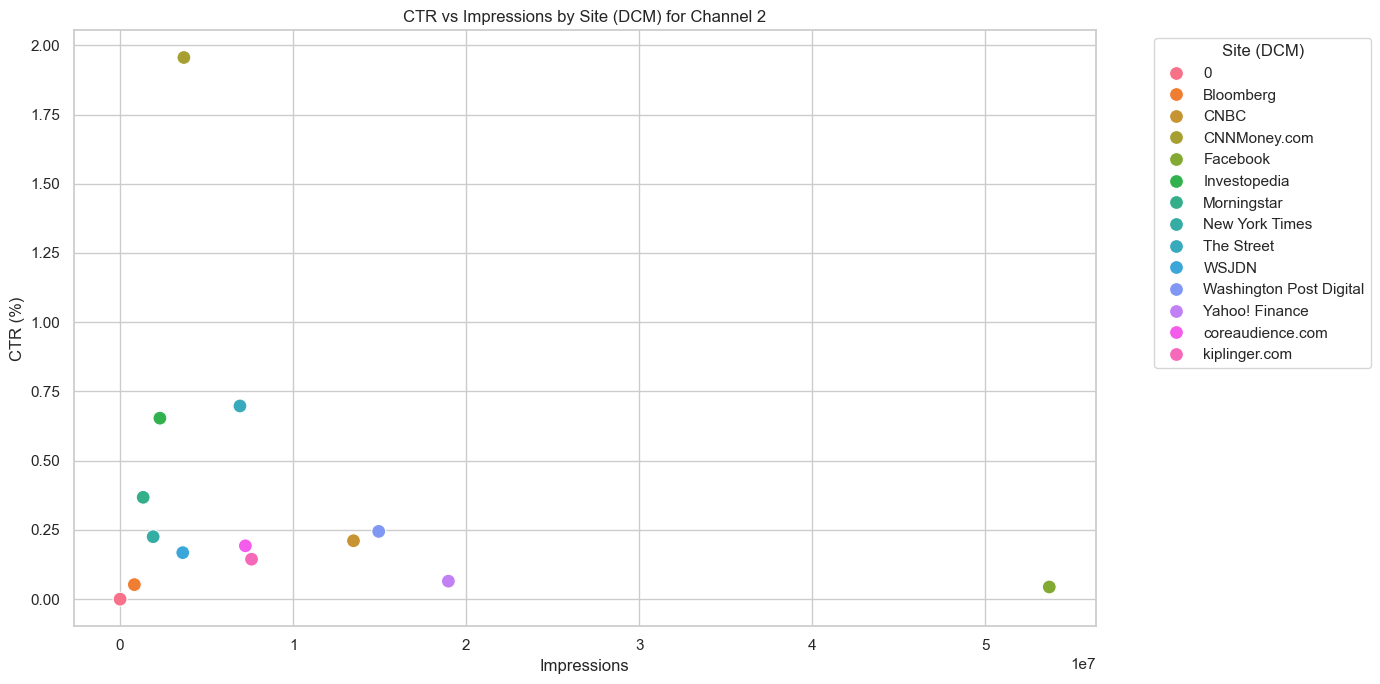

In [16]:
#Plot CTR and Impressions for channel_1
plt.figure(figsize=(14, 7))
sns.scatterplot(x='impressions', y='CTR', hue='campaignname', data=combined_activities_by_channel_1_new_measures, s=100)
plt.title('CTR vs Impressions by Campaign Name for Channel 1')
plt.xlabel('Impressions')
plt.ylabel('CTR (%)')
plt.legend(title='Campaign Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



#Plot CTR and Impressions for channel_2
plt.figure(figsize=(14, 7))
sns.scatterplot(x='impression', y='CTR', hue='site(dcm)', data=combined_activities_by_channel_2_new_measures, s=100)
plt.title('CTR vs Impressions by Site (DCM) for Channel 2')
plt.xlabel('Impressions')
plt.ylabel('CTR (%)')
plt.legend(title='Site (DCM)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [1]:
# Insights:

from scipy import stats

# Channel 1 Outlier Detection

print("Outliers based on CTR and Impressions Z-score for Channel_1:")
# Generate the z-score for Impressions to identify outliers in channel_1
combined_activities_by_channel_1_new_measures['Impressions_zscore'] = stats.zscore(combined_activities_by_channel_1_new_measures['impressions'])
# display(combined_activities_by_channel_1_new_measures)
# Identify outliers with a Z-score threshold of 2
outliers = combined_activities_by_channel_1_new_measures[np.abs(combined_activities_by_channel_1_new_measures['Impressions_zscore']) > 2]
print("Outliers based on Impressions Z-score:")
display(outliers)

# Generate the Z-score for CTR to identify outliers in channel_1
combined_activities_by_channel_1_new_measures['CTR_zscore'] = stats.zscore(combined_activities_by_channel_1_new_measures['CTR'])
# display(combined_activities_by_channel_1_new_measures)
# Identify outliers with a Z-score threshold of 2
outliers = combined_activities_by_channel_1_new_measures[np.abs(combined_activities_by_channel_1_new_measures['CTR_zscore']) > 2]
print("Outliers based on CTR Z-score:")
display(outliers)


print("Outliers based on CTR and Impressions Z-score for Channel_2:")
# Channel 2 Outlier Detection


# Generate the z-score for Impressions to identify outliers in channel_2
combined_activities_by_channel_2_new_measures['Impressions_zscore'] = stats.zscore(combined_activities_by_channel_2_new_measures['impression'])
# display(combined_activities_by_channel_1_new_measures)
# Identify outliers with a Z-score threshold of 2
outliers = combined_activities_by_channel_2_new_measures[np.abs(combined_activities_by_channel_2_new_measures['Impressions_zscore']) > 2]
print("Outliers based on Impressions Z-score:")
display(outliers)

# Generate the Z-score for CTR to identify outliers in channel_2

combined_activities_by_channel_2_new_measures['CTR_zscore'] = stats.zscore(combined_activities_by_channel_2_new_measures['CTR'])
# display(combined_activities_by_channel_2_new_measures)
# Identify outliers with a Z-score threshold of 2
outliers = combined_activities_by_channel_2_new_measures[np.abs(combined_activities_by_channel_2_new_measures['CTR_zscore']) > 2]
print("Outliers based on CTR Z-score:")
display(outliers)





ModuleNotFoundError: No module named 'scipy'

Determine the relationship between sales and impressions/clicks by channel

In [ ]:
# Plot sales by channel to determine the relationship between sales and impressions/clicks by channel over the 2nd half of 2016

combined_activities_by_channel_1_sales_comp = combined_activities_by_channel_1.groupby('month_of_year').agg(
    {
        'clicks': 'sum',
        'impressions': 'sum',
        'cost': 'sum',
        'sales': 'sum'
    }).reset_index()
# display(combined_activities_by_channel_1_sales_comp)


combined_activities_by_channel_2_sales_comp = combined_activities_by_channel_2.groupby('month_of_year').agg(
    {
        'clicks': 'sum',
        'impression': 'sum',
        'cost': 'sum',
        'sales': 'sum'
    }).reset_index()
# display(combined_activities_by_channel_2_sales_comp)


# Drop 0 from the list of values from the month_of_year column
combined_activities_by_channel_1_sales_comp = combined_activities_by_channel_1_sales_comp[combined_activities_by_channel_1_sales_comp['month_of_year'] != 0]
combined_activities_by_channel_2_sales_comp = combined_activities_by_channel_2_sales_comp[combined_activities_by_channel_2_sales_comp['month_of_year'] != 0]


display(combined_activities_by_channel_1_sales_comp)
display(combined_activities_by_channel_2_sales_comp)

,month_of_year,clicks,impressions,cost,sales
1,7.0,160629.0,3008429.0,250181.39,6942982.09
2,8.0,149019.0,3121993.0,236591.38,6536167.91
3,9.0,141397.0,3400997.0,329583.87,6197419.26
4,10.0,137294.0,2406223.0,281216.49,5825652.90
5,11.0,146402.0,1824573.0,236937.79,6348203.66
6,12.0,194485.0,3361923.0,333997.92,8185541.65


,month_of_year,clicks,impression,cost,sales
1,7.0,35083.0,12253533.0,193857.45,3079899.99
2,8.0,56219.0,28858370.0,201489.90,3132935.04
3,9.0,78226.0,55887542.0,331490.10,3297223.80
4,10.0,25870.0,11614334.0,142075.58,1733716.41
5,11.0,35952.0,11659648.0,173050.49,2469716.43
6,12.0,45816.0,16280615.0,236575.03,3055995.32


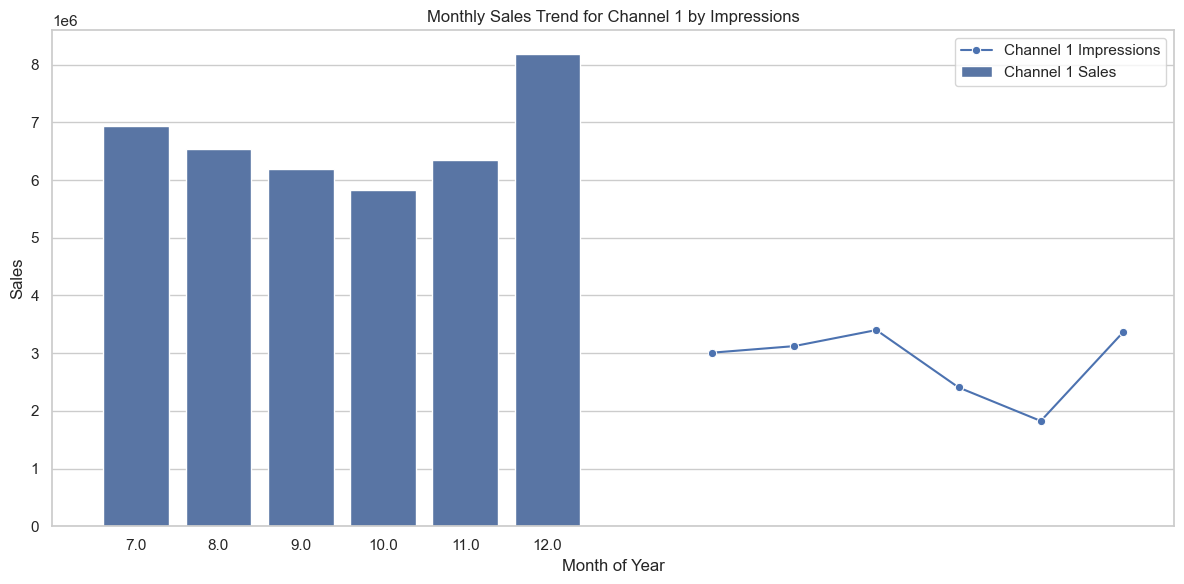

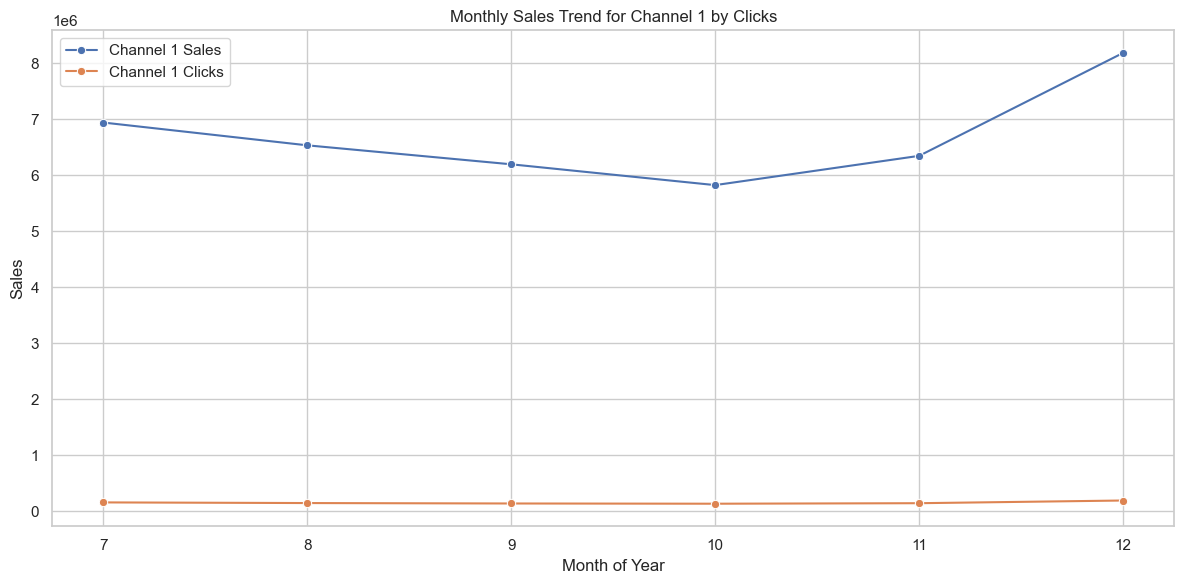

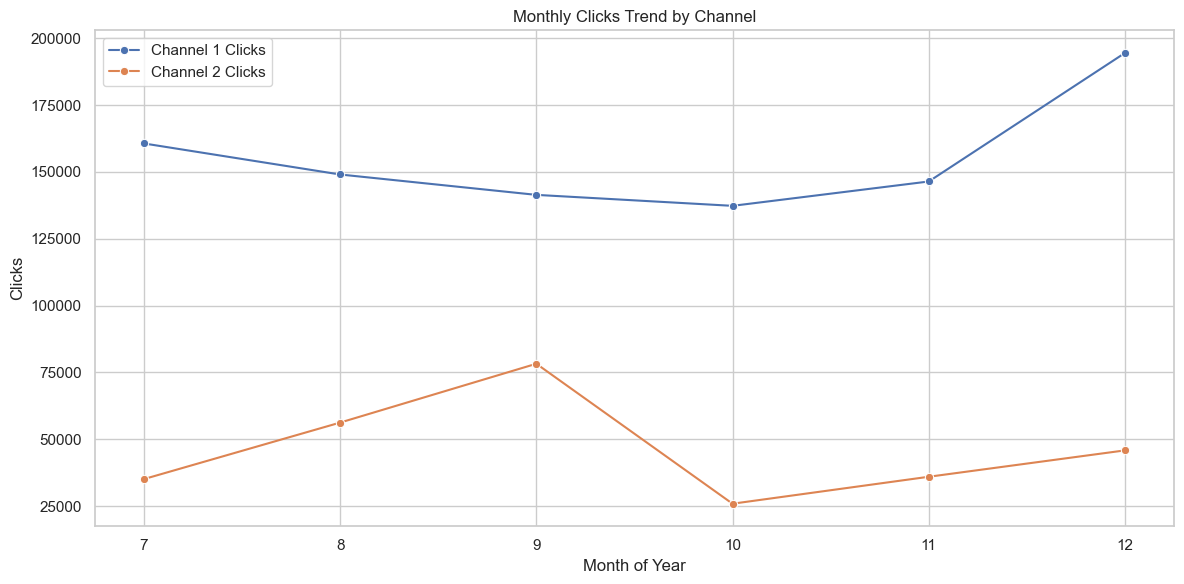

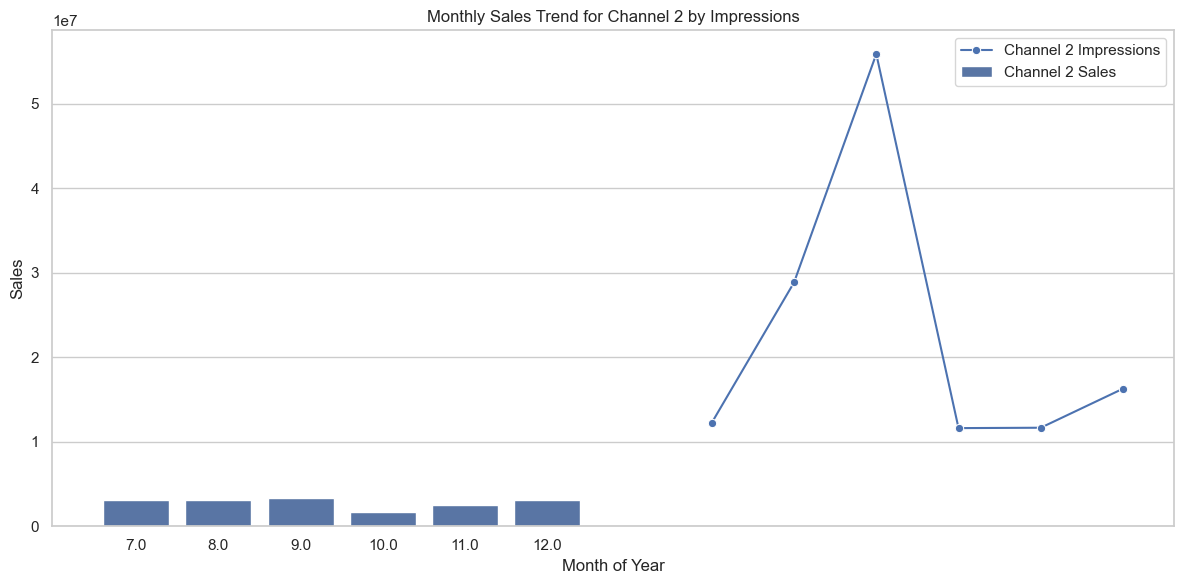

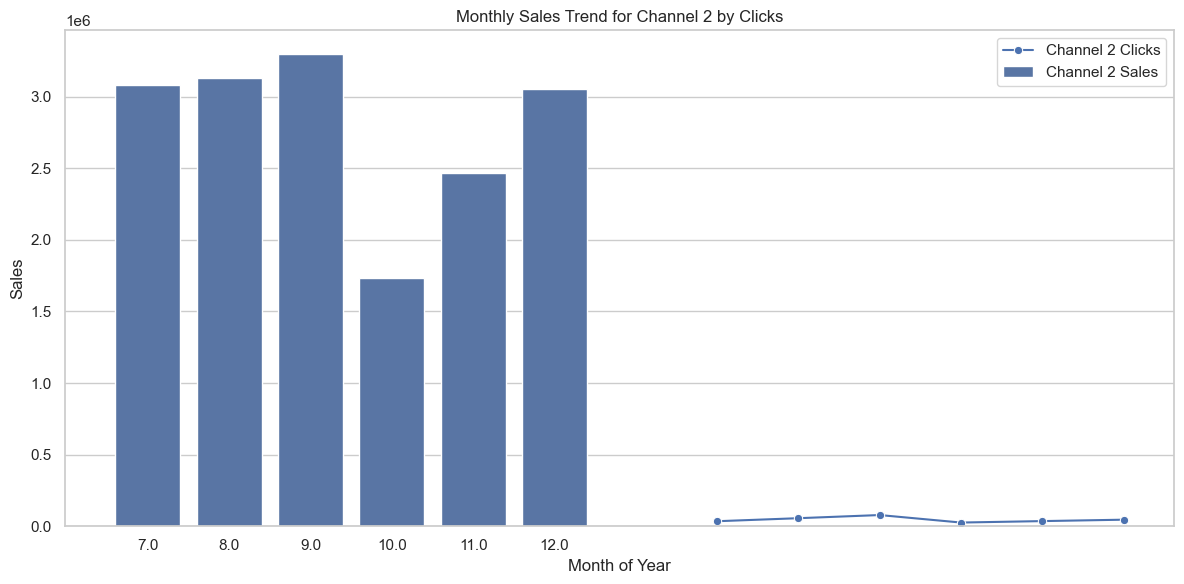

In [ ]:
# plot the distribution of sales, impressions, & clicks by month for channel_1 | Make the sales in bar plot and impressions & clicks in line plot, overlay the plots
plt.figure(figsize=(12, 6))
sns.barplot(x='month_of_year', y='sales', data=combined_activities_by_channel_1_sales_comp, label='Channel 1 Sales')
sns.lineplot(x='month_of_year', y='impressions', data=combined_activities_by_channel_1_sales_comp, marker='o', label='Channel 1 Impressions')
plt.title('Monthly Sales Trend for Channel 1 by Impressions')
plt.xlabel('Month of Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
sns.lineplot(x='month_of_year', y='sales', data=combined_activities_by_channel_1_sales_comp,marker='o', label='Channel 1 Sales')
sns.lineplot(x='month_of_year', y='clicks', data=combined_activities_by_channel_1_sales_comp, marker='o', label='Channel 1 Clicks')
plt.title('Monthly Sales Trend for Channel 1 by Clicks')
plt.xlabel('Month of Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

# Plot clicks from channel_1 and channel_2 to determine the relationship between clicks and sales by channel over the 2nd half of 2016
plt.figure(figsize=(12, 6))
sns.lineplot(x='month_of_year', y='clicks', data=combined_activities_by_channel_1_sales_comp, marker='o', label='Channel 1 Clicks')
sns.lineplot(x='month_of_year', y='clicks', data=combined_activities_by_channel_2_sales_comp, marker='o', label='Channel 2 Clicks')
plt.title('Monthly Clicks Trend by Channel')
plt.xlabel('Month of Year')
plt.ylabel('Clicks')
plt.tight_layout()
plt.show()



# plot the distribution of sales, impressions, & clicks by month for channel_2
plt.figure(figsize=(12, 6))
sns.barplot(x='month_of_year', y='sales', data=combined_activities_by_channel_2_sales_comp, label='Channel 2 Sales')
sns.lineplot(x='month_of_year', y='impression', data=combined_activities_by_channel_2_sales_comp, marker='o', label='Channel 2 Impressions')
plt.title('Monthly Sales Trend for Channel 2 by Impressions')
plt.xlabel('Month of Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


# plot the distribution of sales, impressions, & clicks by month for channel_2
plt.figure(figsize=(12, 6))
sns.barplot(x='month_of_year', y='sales', data=combined_activities_by_channel_2_sales_comp, label='Channel 2 Sales')
sns.lineplot(x='month_of_year', y='clicks', data=combined_activities_by_channel_2_sales_comp, marker='o', label='Channel 2 Clicks')
plt.title('Monthly Sales Trend for Channel 2 by Clicks')
plt.xlabel('Month of Year')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()


Appears that there is a higher correlation of clicks influencing sales for Channel 1 and a higher correlation of impressions influencing sales for Channel 2

## Summary of Insights:
- Channel 1 has a higher CTR compared to Channel 2, indicating that users are more likely to click on ads from Channel 1.
- Channel 2 has a higher volume of impressions, suggesting it has a broader reach.

- The CPC for Channel 1 is lower than that of Channel 2, indicating more efficient spending.

- Outlier analysis revealed certain campaigns and sites with exceptionally high or low CTR and impressions, which may warrant further investigation.


- Appears that there is a higher correlation of clicks influencing sales for Channel 1 and a higher correlation of impressions influencing sales for Channel 2.